# TASK 1

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## SUBMITTED BY- HITEN KANWAR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# DATASET

In [5]:
iris = pd.read_csv("C://Users//Hiten//Downloads//Iris.csv")

# GENERAL ANALYSIS

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print(iris.describe(),"\n")

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000 



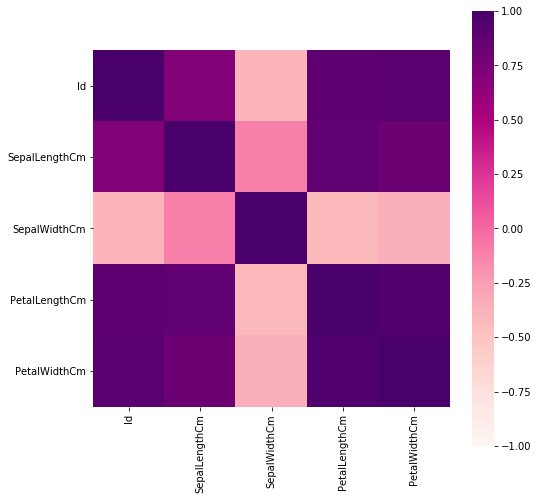

In [8]:
# CORRELATION MATRIX
plt.figure(figsize=(8,8))
sns.heatmap(iris.corr(),vmax=1,vmin=-1,cmap='RdPu',square=True)
plt.show()

# VISUALISATION OF DATA

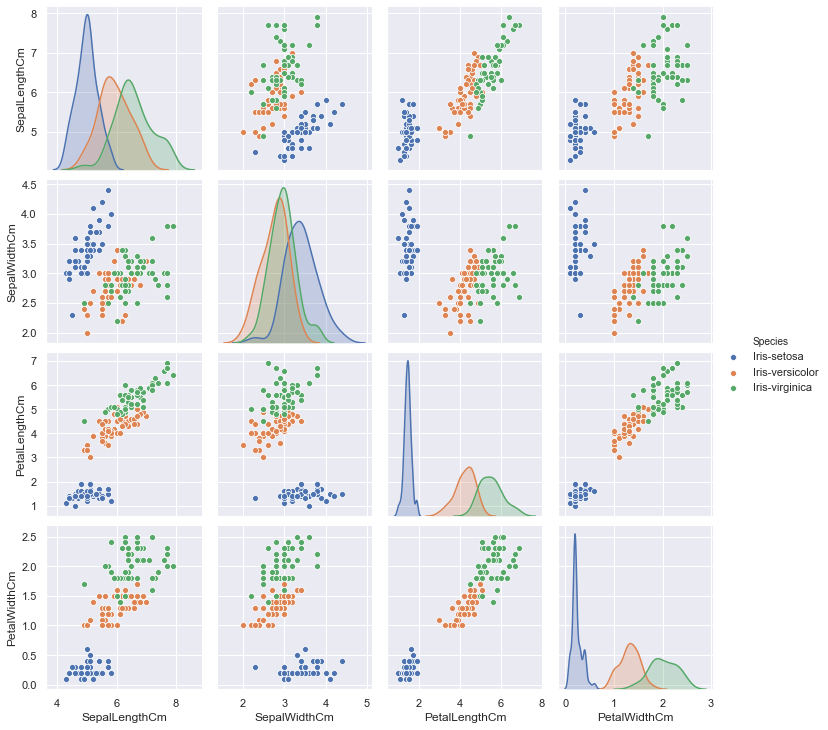

In [9]:
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']],hue='Species',diag_kind="kde")

## NUMBER OF CLUSTERS

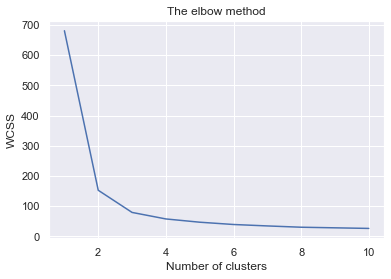

In [10]:
x = iris.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# PREPARING THE DATASET



In [11]:
dataset=iris.drop(['Id','Species'],axis=1)

In [12]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-MEANS MODEL

In [13]:
kmeans = KMeans(n_clusters = 3)

In [14]:
# MODEL PREDICTIONS AND FITTING
predicted=kmeans.fit_predict(dataset)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [15]:
centroid=kmeans.cluster_centers_
centroid

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

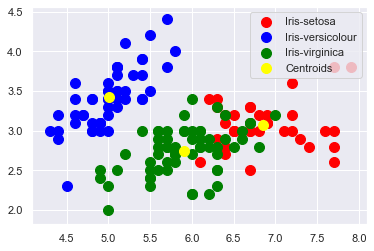

In [16]:
# PREDICTION VISUALISATION
plt.scatter(x[predicted == 0, 0], x[predicted == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predicted == 1, 0], x[predicted == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predicted == 2, 0], x[predicted == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroid[:, 0], centroid[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

# PREDICTING USING USER INPUT

In [17]:
SL=float(input("ENTER SEPAL LENGTH:"))
SW=float(input("ENTER SEPAL WIDTH:"))
PL=float(input("ENTER PETAL LENGTH:"))
PW=float(input("ENTER PETAL WIDTH:"))

ENTER SEPAL LENGTH:2
ENTER SEPAL WIDTH:3
ENTER PETAL LENGTH:4
ENTER PETAL WIDTH:6


In [18]:
d={'1':[SL],'2':[SW],'3':[PL],'4':[PW]}
user_input=pd.DataFrame(data=d)

In [19]:
user_input

,1,2,3,4
0,2.0,3.0,4.0,6.0


In [20]:
pred=kmeans.predict(user_input)

In [21]:
print(pred)

[2]
